In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.models
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [78]:
from google.colab import drive
drive.mount('../content/drive/', force_remount=True)

Mounted at ../content/drive/


In [0]:
import os
#os.listdir('../content/drive/My Drive/EVA/assignment11')

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [81]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


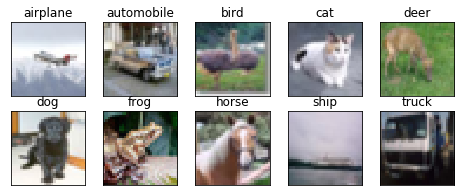

In [82]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [86]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) -0.01866643 0.97224635
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
                        

####Base model from session 6 

In [0]:
# Define the model
def create_base_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), border_mode='same',kernel_regularizer=regularizers.l2(0.0001),name='conv2D_1', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.0001),name='conv2D_2',border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(32, (1, 1),name='conv2D_3'))


  model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.0001),name='conv2D_4',border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.0001),name='conv2D_5',border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(32, (1, 1),name='conv2D_6'))


  model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.0001),name='conv2D_7', border_mode="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3),kernel_regularizer=regularizers.l2(0.0001),name='conv2D_8', border_mode="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(10, (1, 1),name='conv2D_9'))

  model.add(AveragePooling2D(pool_size = (4,4)))
  model.add(Flatten())


  model.add(Activation('softmax'))
  return model


In [90]:
model1 = create_base_model()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_1", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_2", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_4", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_5", padding="same")`
/usr/local/lib/python3.6/dist-p

### Compiling base model

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='../content/drive/My Drive/EVA/session11_model1.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)


# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [92]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_50 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2D_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
__________

### Cutout

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

### LR Finder

In [0]:
from keras.callbacks import Callback
import os
import keras.backend as K

class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


In [96]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/64))

model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 1, 
                                 callbacks=[lr_finder],verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<__main__..., verbose=1, steps_per_epoch=781, epochs=1)`
  """


Epoch 1/1
628/781 [=======================>......] - ETA: 10s - loss: 2.5826 - acc: 0.2968

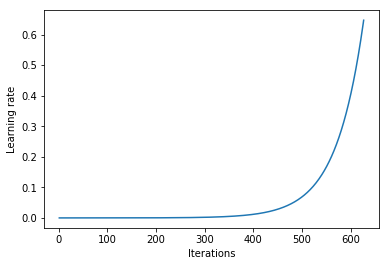

In [97]:
lr_finder.plot_lr()

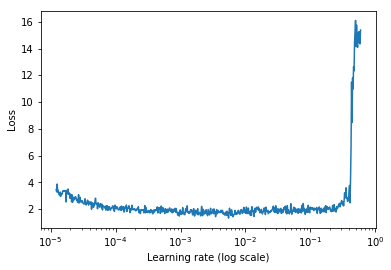

In [98]:
lr_finder.plot()


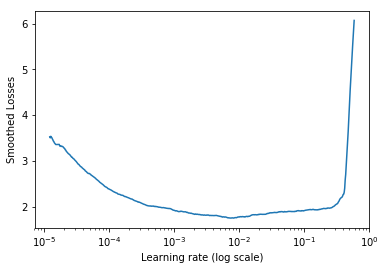

In [99]:
lr_finder.plot_smoothed_loss()

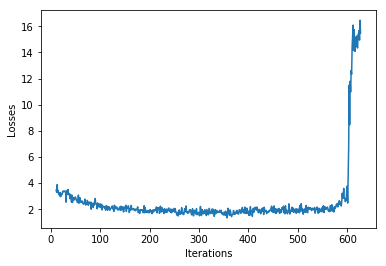

In [100]:
lr_finder.plot_loss()

#### From the above plots, the best starting learning rate is 0.01


#### Compile with base model with baove found LR 0.01 using SGD and momemtum of 0.9

In [101]:
model2 = create_base_model()

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras import optimizers

checkpointer = ModelCheckpoint(filepath='../content/drive/My Drive/EVA/session11_model1.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)

# Compile the model
sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_1", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_2", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_4", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., name="conv2D_5", padding="same")`
/usr/local/lib/python3.6/dist-p

## Train base Model with Cutout with SGD (LR =0.01) Momemtum = 0.9 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=0, steps_per_epoch=390, epochs=100)`
  del sys.path[0]



Epoch 00001: val_acc improved from -inf to 0.57360, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00002: val_acc improved from 0.57360 to 0.63280, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00003: val_acc improved from 0.63280 to 0.70740, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00004: val_acc did not improve from 0.70740

Epoch 00005: val_acc improved from 0.70740 to 0.72220, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00006: val_acc improved from 0.72220 to 0.73840, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00007: val_acc improved from 0.73840 to 0.76410, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00008: val_acc improved from 0.76410 to 0.78540, saving model to ../content/drive/My Drive/EVA/session11_model1.h5

Epoch 00009: val_acc did not improve from 0.78540

Epoch 00010: val_acc did not improve from 0.78

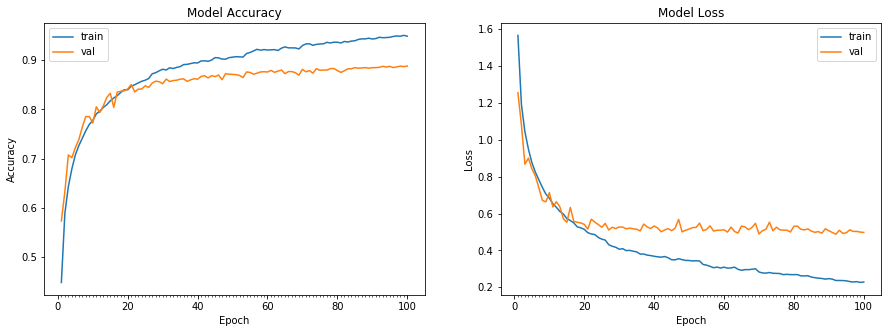

Accuracy on test data is: 88.77


In [102]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks=[checkpointer,lr_reducer],verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model2))

In [0]:
model=keras.models.load_model('../content/drive/My Drive/EVA/session11_model1.h5')


### Top Accuracy  89%

In [104]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print (score[1])

10000/10000 [==============================] - 3s 318us/step
0.8877


### Find Misclassfied images

In [0]:
Y_pred = model.predict(X_test)

### Confusion Matrix

In [106]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
matrix

array([[877,   9,  22,   9,  11,   3,   4,   7,  40,  18],
       [  4, 953,   1,   1,   0,   1,   2,   1,   4,  33],
       [ 26,   0, 817,  40,  41,  29,  35,   9,   3,   0],
       [  9,   2,  24, 778,  32, 103,  28,  14,   7,   3],
       [  3,   1,  21,  20, 911,  18,  11,  14,   1,   0],
       [  4,   2,  19, 101,  23, 820,   5,  21,   2,   3],
       [  5,   1,  19,  32,  15,  11, 911,   4,   1,   1],
       [  2,   1,   8,  23,  25,  16,   2, 917,   2,   4],
       [ 18,   7,   2,   3,   1,   1,   1,   3, 946,  18],
       [  4,  26,   2,  10,   1,   0,   0,   0,  10, 947]])

In [0]:
import pandas as pd

def decode(datum):
    return np.argmax(datum)
  
ytest = []
ypred = []

for i in range(len(Y_test)):
  ytest.append(decode(Y_test[i]))
  ypred.append(decode(Y_pred[i]))

df = pd.DataFrame()
df['Actual'] = ytest
df['Pred']  =  ypred 

### Select 25 Misclassified images (randomly)

In [0]:
misclassified = df.index[df['Actual']!=df['Pred']].tolist()
import random
misclassified = random.sample(misclassified, 25)

### Model  Grad CAM results on Misclassified images

actual class dog
predicted class bird
Image index is 7147


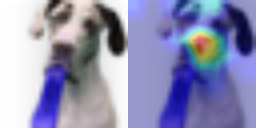

 : 
actual class bird
predicted class cat
Image index is 2193


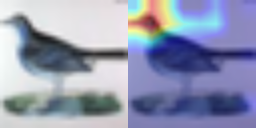

 : 
actual class bird
predicted class airplane
Image index is 731


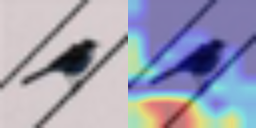

 : 
actual class dog
predicted class bird
Image index is 9557


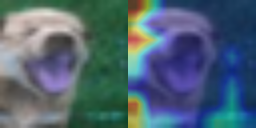

 : 
actual class frog
predicted class bird
Image index is 4066


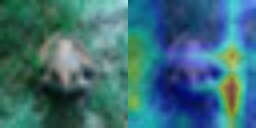

 : 
actual class ship
predicted class airplane
Image index is 3301


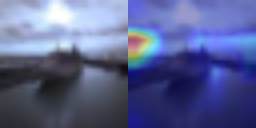

 : 
actual class horse
predicted class deer
Image index is 3416


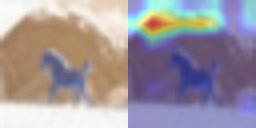

 : 
actual class cat
predicted class horse
Image index is 9292


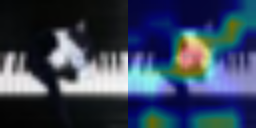

 : 
actual class bird
predicted class deer
Image index is 1746


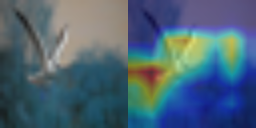

 : 
actual class dog
predicted class cat
Image index is 7781


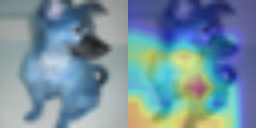

 : 
actual class dog
predicted class cat
Image index is 6023


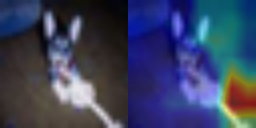

 : 
actual class cat
predicted class dog
Image index is 2253


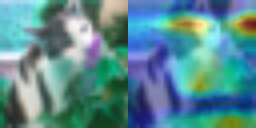

 : 
actual class automobile
predicted class truck
Image index is 5882


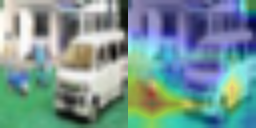

 : 
actual class airplane
predicted class bird
Image index is 378


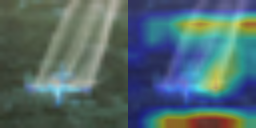

 : 
actual class frog
predicted class bird
Image index is 6965


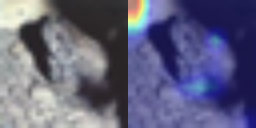

 : 
actual class ship
predicted class airplane
Image index is 6490


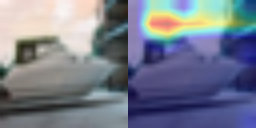

 : 
actual class dog
predicted class cat
Image index is 5749


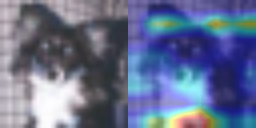

 : 
actual class dog
predicted class cat
Image index is 6640


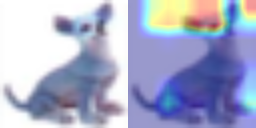

 : 
actual class bird
predicted class frog
Image index is 5839


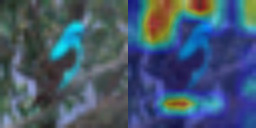

 : 
actual class dog
predicted class cat
Image index is 6993


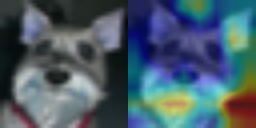

 : 
actual class dog
predicted class cat
Image index is 5298


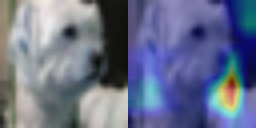

 : 
actual class dog
predicted class cat
Image index is 2573


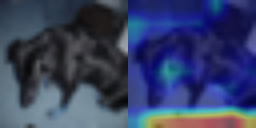

 : 
actual class bird
predicted class cat
Image index is 8022


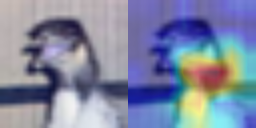

 : 
actual class deer
predicted class dog
Image index is 7143


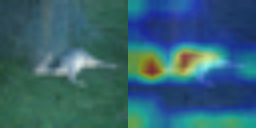

 : 
actual class cat
predicted class dog
Image index is 4306


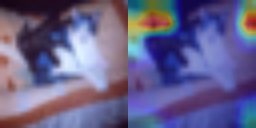

 : 


In [115]:
import cv2
from google.colab.patches import cv2_imshow

images = misclassified

for j in images:
  x = testX[j]
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2D_8")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap) 
  img = (testX[j])
  img = cv2.resize(img,(128,128))
  heatmap = cv2.resize(heatmap, (128, 128))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  concatimg = cv2.hconcat([img,superimposed_img])
  # concatenated image
  print ("actual class " + str(class_names[df['Actual'][j]]))
  print ("predicted class " + str(class_names[df['Pred'][j]]))
  print ("Image index is " + str(j))
  cv2_imshow(concatimg)
  cv2.waitKey(0)
  print (" : ")
  j = j + 1
